In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

PATH = '../../../../Latex/Drosophila/Figures_LAD/'

In [6]:
raw_data = np.loadtxt('../../dmel_data.txt').T  # transpose the data so that the shape is 6078 cells x (3+6*99) columns
gene_exp = np.copy(raw_data[:,3:])  # excluding (x,y,z) coordinates)

complete_all = ([int(x) - 1 for x in open('../../indices_complete.txt','r').readline().split()])
comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))

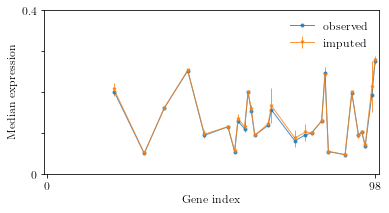

In [42]:
matplotlib.rcParams['legend.frameon'] = False
matplotlib.rcParams.update({'font.size':12})
matplotlib.rcParams.update({'font.family':'Times New Roman'})
matplotlib.rcParams['text.usetex']=True

with open('../pickles/imputed_10.pkl', 'rb') as f:
    res = pickle.load(f)
    
mean_of_med = np.mean([res[i]['med'] for i in range(10)], axis=0)
std_of_med = np.std([res[i]['med'] for i in range(10)], axis=0)
data = np.median(np.vstack([gene_exp[:, i::6] for i in range(6)])[:, comp_ind], axis=0)

plt.figure(figsize=(6,3))
plt.plot(comp_ind, data, 'o-', ms=3, linewidth=1, alpha=0.8, label='observed')
plt.errorbar(comp_ind, mean_of_med[comp_ind], yerr=std_of_med[comp_ind], fmt='v-', ms=3, linewidth=1, alpha=0.8, label='imputed')
plt.xlabel('Gene index')
plt.ylabel('Median expression')
plt.xlim(-1,99)
plt.xticks([0,98],['0','98'])
plt.ylim(0,0.4)
plt.yticks([0,0.1,0.2,0.3,0.4],['0','','','','0.4'])
plt.legend()
plt.savefig(PATH+'fig1.pdf', bbox_inches='tight')
plt.show()

In [27]:
matplotlib.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.form

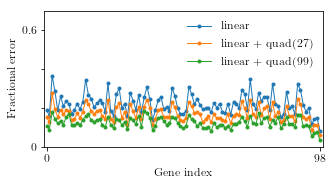

In [177]:
matplotlib.rcParams.update({'font.size':12})
matplotlib.rcParams.update({'font.family':'Times New Roman'})
matplotlib.rcParams['legend.frameon'] = False

with open('../pickles/LAD_lin_ttv.pkl', 'rb') as f:
    LAD_lin = pickle.load(f)    

with open('../pickles/LAD_quad_ttv.pkl', 'rb') as f:
    LAD_quad = pickle.load(f)
    
with open('../pickles/LAD_(99,99)_ttv.pkl', 'rb') as f:
    LAD_99 = pickle.load(f)

# labels = ['linear', 'linear + quad']

# fig = plt.figure(figsize=(6,8.75))
# plt.subplots_adjust(hspace = 0.25)
# ax1 = fig.add_subplot(3,1,1)
# plt.plot(range(99), LAD_lin[0]['ferror'], 'o-', markersize=3, linewidth=1, label='linear')
# # plt.xlabel('Gene index')
# plt.ylabel('Fractional error')
# plt.xlim(-1,99)
# plt.ylim(0,0.7)
# plt.xticks([0,98],['0','98'])
# plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
# plt.legend(bbox_to_anchor=(0.272,1))
# plt.text(-1, 0.7*1.02, '(A)')

# ax2 = fig.add_subplot(3,1,2)
# plt.plot(range(99), LAD_lin[0]['ferror'], 'o-', markersize=3, linewidth=1, label='linear')
# plt.plot(range(99), LAD_quad[0]['ferror'], 'o-', markersize=3, linewidth=1, label='linear + quad(27)')
# # plt.xlabel('Gene index')
# plt.ylabel('Fractional error')
# plt.xlim(-1,99)
# plt.ylim(0,0.7)
# plt.xticks([0,98],['0','98'])
# plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
# plt.legend(bbox_to_anchor=(0.45,1))
# plt.text(0, 0.7*1.02, '(B)')

# ax3 = fig.add_subplot(3,1,3)
# plt.plot(range(99), LAD_lin[0]['ferror'], 'o-', markersize=3, linewidth=1, label='linear')
# plt.plot(range(99), LAD_quad[0]['ferror'], 'o-', markersize=3, linewidth=1, label='linear + quad(27)')
# plt.plot(range(99), LAD_99['ferror'], 'o-', markersize=3, linewidth=1, label='linear + quad(99)')
# plt.xlabel('Gene index')
# plt.ylabel('Fractional error')
# plt.xlim(-1,99)
# plt.ylim(0,0.7)
# plt.xticks([0,98],['0','98'])
# plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
# plt.legend(bbox_to_anchor=(0.45,1))
# plt.text(0,0.7*1.02, '(C)')
# plt.savefig(PATH+'fig2.pdf', bbox_inches='tight')
# plt.show()

plt.figure(figsize=(5,2.5))
plt.plot(range(99), LAD_lin[0]['ferror'], 'o-', markersize=3, linewidth=1, label='linear')
plt.plot(range(99), LAD_quad[0]['ferror'], 'o-', markersize=3, linewidth=1, label='linear + quad(27)')
plt.plot(range(99), LAD_99['ferror'], 'o-', markersize=3, linewidth=1, label='linear + quad(99)')
plt.xlabel('Gene index')
plt.ylabel('Fractional error')
plt.xlim(-1,99)
plt.ylim(0,0.7)
plt.xticks([0,98],['0','98'])
plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
plt.legend()
plt.savefig(PATH+'fig2.pdf', bbox_inches='tight')
plt.show()

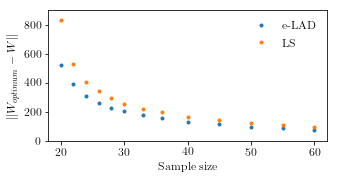

In [159]:
with open('../pickles/skl_(99,99)_tv.pkl', 'rb') as f:
    skl = pickle.load(f)
w_skl = skl['w'].T

with open('../pickles/LAD_(99,99)_ttv.pkl', 'rb') as f:
    LAD = pickle.load(f)
w_LAD = LAD['w']

ratio = [20,22,24,26,28,30,33,36,40,45,50,55,60]

diff_LAD = []
for r in ratio:
    w = np.zeros((4950,99))
    bias = np.zeros(99)
    for k in range(990):
        i = int(k/10)
        with open('../pickles/titrate_%s/res_%s.pkl' % (r,k), 'rb') as f:
            res = pickle.load(f)
        w[:, i:(i+1)] += res[0]
    w = w/10
    diff_LAD.append(np.linalg.norm(w_LAD - w))
    
ratio = [0.2,0.22,0.24,0.26,0.28,0.3,0.33,0.36,0.4,0.45,0.5,0.55,0.6]

with open('../pickles/titration_skl.pkl', 'rb') as f:
    res_skl = pickle.load(f)

plt.figure(figsize=(5,2.4))
diff_skl =[np.linalg.norm(w_skl-res_skl[i]['w'][0]) for i in range(13)]
plt.plot(ratio, diff_LAD, 'o', c='tab:blue', ms=3, label='e-LAD')
plt.plot(ratio, diff_skl, 'o', c='tab:orange', ms=3, label='LS')
plt.xticks([0.2,0.3,0.4,0.5,0.6],['20%','30%','40%','50%','60%'])
plt.xlim(0.18,0.62)
plt.ylim(0,900)
plt.ylabel('$||W_{optimum} - W||$')
plt.xlabel('Sample size')
plt.legend()
plt.savefig(PATH+'fig3.pdf', bbox_inches='tight')

MannwhitneyuResult(statistic=3067594.0, pvalue=2.4268102371774094e-114)
MannwhitneyuResult(statistic=3067594.0, pvalue=2.4268102371774094e-114)


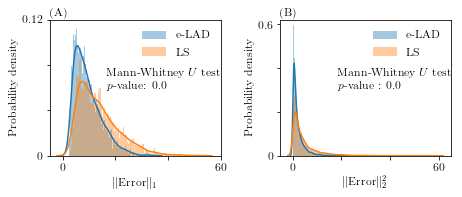

MannwhitneyuResult(statistic=3074408.0, pvalue=2.3240698621545703e-113)
MannwhitneyuResult(statistic=3074408.0, pvalue=2.3240698621545703e-113)


In [189]:
from scipy import stats, linalg

data_all = np.loadtxt('../../data_complete.txt')
all_bin = np.vsplit(data_all, 6)
all_init = np.vstack([all_bin[i] for i in range(5)])
all_diff = np.vstack([all_bin[i+1]-all_bin[i] for i in range(5)])

def make_quad(X):
    quad = np.zeros((int(X.shape[0]), int(X.shape[1] + (X.shape[1]*(X.shape[1]-1))/2)))
    quad[:, :X.shape[1]] = np.copy(X)
    col = X.shape[1]
    for i in range(X.shape[1]-1):
        for j in range(i+1, X.shape[1]):
            quad[:,col] = (X[:,i]*X[:,j])
            col += 1
    return quad

with open('../pickles/validation_cells.pkl', 'rb') as f:
    cells_v = pickle.load(f)

val = np.hstack([cells_v+(6078*i) for i in range(5)])

X_v = all_init[val]
quad_v = make_quad(X_v)
y_v = all_diff[val]

w = np.zeros((4950,99))
bias = np.zeros(99)
for k in range(990):
    i = int(k/10)
    with open('../pickles/titrate_20/res_%s.pkl' % (k), 'rb') as f:
        res = pickle.load(f)
    w[:,i:(i+1)] += res[0]
    bias[i] += res[1]
w = w/10
bias = bias/10

yp = X_v + bias + quad_v.dot(w)
yp[yp<0] = 0
ya = X_v + y_v

error_lad = np.abs(yp-ya)

with open('../pickles/titration_skl.pkl', 'rb') as f:
    res_skl = pickle.load(f)
    
error_skl = res_skl[0]['error'][0]

fig = plt.figure(figsize=(7.2,2.5))
plt.subplots_adjust(wspace = 0.35)
ax1 = fig.add_subplot(1,2,1)
sns.distplot(np.sum(error_lad, axis=1), kde_kws=dict(linewidth=1.5), bins=100, label='e-LAD')
sns.distplot(np.sum(error_skl, axis=1), kde_kws=dict(linewidth=1.5), bins=100, label='LS')
plt.xlim(-5,60)
plt.xticks([0,20,40,60],['0','','','60'])
plt.ylim(0,0.12)
plt.yticks([0,0.04,0.08,0.12],['0','','','0.12'])
plt.xlabel(r'$||{\rm Error}||_{1}$')
plt.ylabel(r'Probability density')
plt.legend()
plt.text(-5, 0.12*1.03, '(A)')
plt.text(16.5, 0.12*0.5, 'Mann-Whitney $U$ test \n $p$-value: 0.0')

print(stats.mannwhitneyu(np.sum(error_lad, axis=1), np.sum(error_skl, axis=1)))
print(stats.mannwhitneyu(np.sum(error_lad, axis=1), np.sum(error_skl, axis=1), alternative='less'))

ax2 = fig.add_subplot(1,2,2)
sns.distplot(np.sum(error_lad**2, axis=1), kde_kws=dict(linewidth=1.5), bins=100, label='e-LAD')
sns.distplot(np.sum(error_skl**2, axis=1), kde_kws=dict(linewidth=1.5), bins=100, label='LS')
plt.xlim(-5,65)
plt.ylim(0,0.62)
plt.xticks([0,20,40,60],['0','','','60'])
plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
plt.xlabel(r'$||{\rm Error}||_{2}^{2}$')
plt.ylabel('Probability density')
plt.legend()
plt.text(-5, 0.62*1.03, '(B)')
plt.text(18, 0.62*0.5, 'Mann-Whitney $U$ test \n $p$-value : 0.0')
plt.savefig(PATH+'fig4.pdf', bbox_inches='tight')
plt.show()

print(stats.mannwhitneyu(np.sum(error_lad**2, axis=1), np.sum(error_skl**2, axis=1)))
print(stats.mannwhitneyu(np.sum(error_lad**2, axis=1), np.sum(error_skl**2, axis=1), alternative='less'))

In [6]:
with open('../pickles/LAD_lin_ttv.pkl', 'rb') as f:
    LAD_lin = pickle.load(f)    

with open('../pickles/LAD_quad_ttv.pkl', 'rb') as f:
    LAD_quad = pickle.load(f)
    
with open('../pickles/LAD_(99,99)_ttv.pkl', 'rb') as f:
    LAD_99 = pickle.load(f)

data_all = np.loadtxt('../../data_complete.txt')
all_bin = np.vsplit(data_all, 6)
all_init = np.vstack([all_bin[i] for i in range(5)])
all_diff = np.vstack([all_bin[i+1]-all_bin[i] for i in range(5)])

with open('../pickles/validation_cells.pkl', 'rb') as f:
    cells_v = pickle.load(f)

val = np.hstack([cells_v+(6078*i) for i in range(5)])

w = LAD_lin[0]['w']
bias = LAD_lin[0]['bias']

X_v = all_init[val]
yp = X_v + X_v.dot(w) + bias
print(len(yp[yp<0])/yp.size, np.quantile(np.abs(yp[yp<0]), 0.99), np.min(yp))

def make_quad(X):
    quad = np.zeros((int(X.shape[0]), int((X.shape[1]*(X.shape[1]-1))/2)))
    col = 0
    for i in range(X.shape[1]-1):
        for j in range(i+1, X.shape[1]):
            quad[:,col] = (X[:,i]*X[:,j])
            col += 1
    return quad

w = LAD_quad[0]['w']
bias = LAD_quad[0]['bias']

X_init = np.copy(all_init[val])
quad = make_quad(all_init[:,comp_ind][val])
quad_v = np.hstack((X_init, quad))
yp = X_init + quad_v.dot(w) + bias
print(len(yp[yp<0])/yp.size, np.quantile(np.abs(yp[yp<0]), 0.99), np.min(yp))

def make_quad(X):
    quad = np.zeros((int(X.shape[0]), int(X.shape[1] + (X.shape[1]*(X.shape[1]-1))/2)))
    quad[:, :X.shape[1]] = np.copy(X)
    col = X.shape[1]
    for i in range(X.shape[1]-1):
        for j in range(i+1, X.shape[1]):
            quad[:,col] = (X[:,i]*X[:,j])
            col += 1
    return quad

w = LAD_99['w']
bias = LAD_99['bias']
X_init = np.copy(all_init[val])
quad_v = make_quad(X_init)
yp = X_init + quad_v.dot(w) + bias
print(len(yp[yp<0])/yp.size, np.quantile(np.abs(yp[yp<0]), 0.99), np.min(yp))

0.007834928229665071 0.12173423984083906 -0.28612602840538337
0.00611709197235513 0.10798547970242979 -0.17504143517339643
0.005462519936204147 0.08821357383675085 -0.12346127346259575


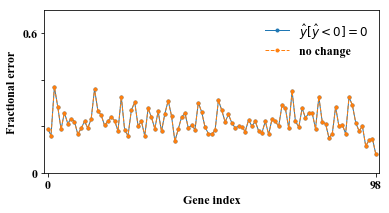

In [9]:
with open('../pickles/LAD_lin_ttv.pkl', 'rb') as f:
    res = pickle.load(f)
with open('../pickles/LAd_lin_ttv_neg.pkl', 'rb') as f:
    res_neg = pickle.load(f)

gene_comp = [[],[],comp_ind]
X = np.copy(all_init)
y_list = [np.copy(all_diff)]

i=0
y = y_list[i]
w = res[i]['w']
bias = res[i]['bias']
ferror = res[i]['ferror']

X_in = np.copy(X)

val = np.hstack([cells_v+(6078*i) for i in range(5)])

X_v = X_in[val]
y_v = y[val]

X_init = np.copy(X[val])

yp = X_init + bias + X_v.dot(w)
ya = X_init + y_v
ferror = np.sum(np.abs(yp - ya), axis=0)/np.sum(np.abs(ya), axis=0)

plt.figure(figsize=(6,3))
#     plt.plot(range(len(ferror)), res[i]['ferror'], 'o-')
plt.plot(range(len(ferror)), ferror, 'o-', ms=3, lw=1, label='$\hat{y}[\hat{y} < 0] = 0$')
plt.plot(range(len(ferror)), res_neg[i]['ferror'], 'o--', ms=3, lw=1, label='no change')
plt.xlabel('Gene index')
plt.ylabel('Fractional error')
plt.xlim(-1,99)
plt.ylim(0,0.7)
plt.xticks([0,98],['0','98'])
plt.yticks([0,0.2,0.4,0.6],['0','','','0.6'])
plt.legend()
plt.savefig(PATH+'sfig1.pdf', bbox_inches='tight')
plt.show()

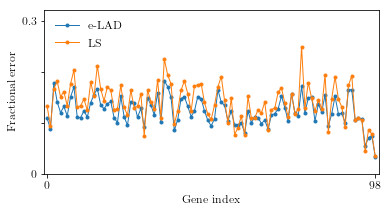

MannwhitneyuResult(statistic=4319512.0, pvalue=5.347707579246956e-06)
MannwhitneyuResult(statistic=4319512.0, pvalue=5.347707579246956e-06)


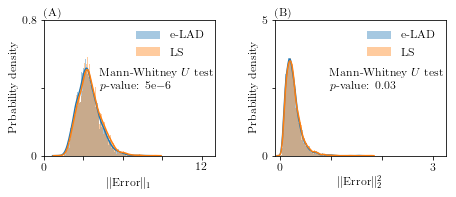

MannwhitneyuResult(statistic=4491146.0, pvalue=0.02907379195604959)
MannwhitneyuResult(statistic=4491146.0, pvalue=0.02907379195604959)


In [209]:
with open('../pickles/LAD_(99,99)_ttv.pkl', 'rb') as f:
    LAD = pickle.load(f)
with open('../pickles/skl_(99,99)_tv.pkl', 'rb') as f:
    LS = pickle.load(f)
    
plt.figure(figsize=(6,3))
plt.plot(range(len(LAD['ferror'])), LAD['ferror'], 'o-', ms=3, linewidth=1, label='e-LAD')
plt.plot(range(len(LS['ferror'])), LS['ferror'], 'o-', ms=3, lw=1, label='LS')
plt.xlim(-1,99)
plt.xticks([0,98],['0','98'])
plt.ylim(0,0.32)
plt.yticks([0,0.1,0.2,0.3],['0','','','0.3'])
plt.legend()
plt.xlabel('Gene index')
plt.ylabel('Fractional error')
plt.savefig(PATH+'fig5.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(7.2,2.5))
plt.subplots_adjust(wspace = 0.35)
ax1 = fig.add_subplot(1,2,1)
error_lad = np.sum(LAD['error'], axis=1)
sns.distplot(error_lad, bins=100, label='e-LAD')
error_skl = np.sum(LS['error'], axis=1)
sns.distplot(error_skl, bins=100, label='LS')
plt.xlim(0,13)
plt.xticks([0,3,6,9,12], ['0','','','','12'])
plt.ylim(0,0.8)
plt.yticks([0,0.4,0.8],['0','','0.8'])
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel(r'$||{\rm Error}||_{1}$')
plt.ylabel('Prbability density')
plt.text(0,0.8*1.03,'(A)')
plt.text(4.2, 0.8*0.5, 'Mann-Whitney $U$ test \n $p$-value: 5e$-6$')

print(stats.mannwhitneyu(error_lad, error_skl))
print(stats.mannwhitneyu(error_lad, error_skl, alternative='less'))

ax2 = fig.add_subplot(1,2,2)
error_lad = np.sum(LAD['error']**2, axis=1)
sns.distplot(error_lad, kde_kws=dict(linewidth=1.5), bins=100, label='e-LAD')
error_skl = np.sum(LS['error']**2, axis=1)
sns.distplot(error_skl, kde_kws=dict(linewidth=1.5), bins=100, label='LS')
plt.xlim(-0.1, 3.25)
plt.xticks([0,1,2,3],['0','','','3'])
plt.ylim(0,5)
plt.yticks([0,2.5,5],['0','','5'])
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel(r'$||{\rm Error}||_{2}^{2}$')
plt.ylabel('Prbability density')
plt.text(-0.1, 5*1.03, '(B)')
plt.text(0.96, 5*0.5, 'Mann-Whitney $U$ test \n $p$-value: 0.03')
plt.savefig(PATH+'fig6.pdf', bbox_inches='tight')
plt.show()

print(stats.mannwhitneyu(error_lad, error_skl))
print(stats.mannwhitneyu(error_lad, error_skl, alternative='less'))

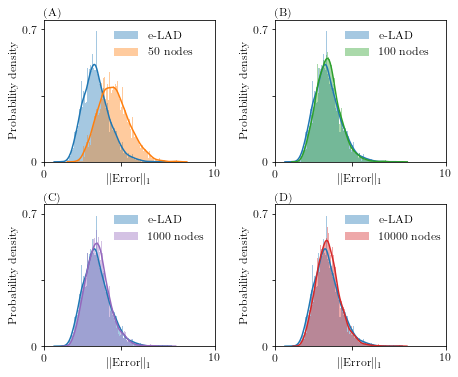

In [216]:
# plt.figure(figsize=(3,3))
n_node = [50,100,1000,10000]
colors  = ['tab:orange', 'tab:green', 'tab:purple', 'tab:red']
numeric = ['(A)', '(B)', '(C)', '(D)']
with open('../pickles/LAD_(99,99)_ttv.pkl', 'rb') as f:
    lad = pickle.load(f)
    
fig = plt.figure(figsize=(7.2,6))
plt.subplots_adjust(wspace=0.35, hspace=0.3)
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    sns.distplot(np.sum(lad['error'], axis=1), bins=100, label='e-LAD')
    with open('../pickles/keras/ttv_mae/hidden/%s.pkl' % n_node[i], 'rb') as f:
        res = pickle.load(f)
    yp = all_init[val] + res['pred']
    ya = all_init[val] + y_v
    
    error = np.abs(yp-ya)
    sns.distplot(np.sum(error, axis=1), bins=100, color=colors[i], label='%s nodes' % n_node[i])
    plt.xlim(0,10)
    plt.ylim(0,0.75)
    plt.xticks([0,5,11], ['0','','10'])
    plt.yticks([0,0.35,0.7], ['0','','0.7'])
    plt.text(0, 0.75*1.03, numeric[i])
    plt.text(0.5, -.15, r'$||{\rm Error}||_{1}$', horizontalalignment='center', transform=ax.transAxes)
    plt.ylabel('Probability density')
    plt.legend(bbox_to_anchor=(0.35,1))
plt.savefig(PATH+'fig7.pdf', bbox_inches='tight')

In [206]:
with open('../pickles/keras/ttv_mae/hidden/50.pkl', 'rb') as f:
    res = pickle.load(f)
yp = all_init[val] + res['pred']
ya = all_init[val] + y_v
error_50 = np.sum(np.abs(yp-ya), axis=1)

with open('../pickles/keras/ttv_mae/hidden/100.pkl', 'rb') as f:
    res = pickle.load(f)
yp = all_init[val] + res['pred']
ya = all_init[val] + y_v
error_100 = np.sum(np.abs(yp-ya), axis=1)

with open('../pickles/keras/ttv_mae/hidden/500.pkl', 'rb') as f:
    res = pickle.load(f)
yp = all_init[val] + res['pred']
ya = all_init[val] + y_v
error_500 = np.sum(np.abs(yp-ya), axis=1)

with open('../pickles/keras/ttv_mae/hidden/1000.pkl', 'rb') as f:
    res = pickle.load(f)
yp = all_init[val] + res['pred']
ya = all_init[val] + y_v
error_1000 = np.sum(np.abs(yp-ya), axis=1)

with open('../pickles/keras/ttv_mae/hidden/5000.pkl', 'rb') as f:
    res = pickle.load(f)
yp = all_init[val] + res['pred']
ya = all_init[val] + y_v
error_5000 = np.sum(np.abs(yp-ya), axis=1)

with open('../pickles/keras/ttv_mae/hidden/10000.pkl', 'rb') as f:
    res = pickle.load(f)
yp = all_init[val] + res['pred']
ya = all_init[val] + y_v
error_10000 = np.sum(np.abs(yp-ya), axis=1)

print(stats.mannwhitneyu(np.sum(lad['error'], axis=1), error_50, alternative='less'))
print(stats.mannwhitneyu(np.sum(lad['error'], axis=1), error_100, alternative='less'))
print(stats.mannwhitneyu(np.sum(lad['error'], axis=1), error_1000, alternative='less'))
print(stats.mannwhitneyu(np.sum(lad['error'], axis=1), error_10000, alternative='less'))
print(stats.mannwhitneyu(error_50, error_100, alternative='two-sided'))
print(stats.mannwhitneyu(error_50, error_1000, alternative='two-sided'))
print(stats.mannwhitneyu(error_50, error_10000, alternative='two-sided'))
print(stats.mannwhitneyu(error_100, error_1000, alternative='two-sided'))
print(stats.mannwhitneyu(error_100, error_10000, alternative='two-sided'))
print(stats.mannwhitneyu(error_1000, error_10000, alternative='two-sided'))

MannwhitneyuResult(statistic=1766935.0, pvalue=0.0)
MannwhitneyuResult(statistic=4392552.0, pvalue=0.00042602929777607774)
MannwhitneyuResult(statistic=4354179.0, pvalue=4.8889722445818296e-05)
MannwhitneyuResult(statistic=4403660.0, pvalue=0.0007543949122723335)
MannwhitneyuResult(statistic=7440013.0, pvalue=0.0)
MannwhitneyuResult(statistic=7418390.0, pvalue=0.0)
MannwhitneyuResult(statistic=7469192.0, pvalue=0.0)
MannwhitneyuResult(statistic=4580531.0, pvalue=0.5562435390053742)
MannwhitneyuResult(statistic=4634786.0, pvalue=0.8380679054588787)
MannwhitneyuResult(statistic=4675828.0, pvalue=0.4213400178803368)


MannwhitneyuResult(statistic=4410946.0, pvalue=0.0010828327979307847)
MannwhitneyuResult(statistic=4207874.0, pvalue=8.000300193919922e-10)
MannwhitneyuResult(statistic=4017050.0, pvalue=5.602041194601944e-19)
MannwhitneyuResult(statistic=3822821.0, pvalue=1.0131021371392117e-31)


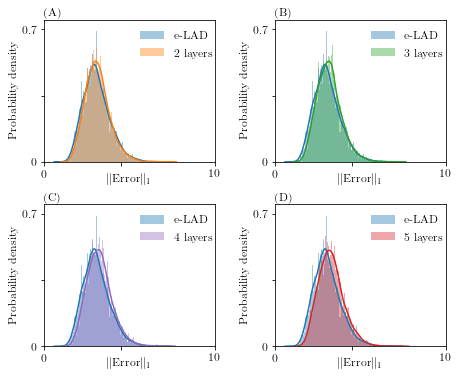

In [219]:
n_layer = [1,2,3,4]
fig = plt.figure(figsize=(7.2,6))
plt.subplots_adjust(wspace=0.35, hspace=0.3)
for (e,i) in enumerate(n_layer):
    ax = fig.add_subplot(2,2,e+1)
    with open('../pickles/keras/ttv_mae/hidden/layers%s.pkl' % i, 'rb') as f:
        res = pickle.load(f)
    yp = all_init[val] + res['pred']
    ya = all_init[val] + y_v
    
    error = np.abs(yp-ya)
    sns.distplot(np.sum(lad['error'], axis=1), bins=100, label='e-LAD')
    sns.distplot(np.sum(error, axis=1), bins=100, color=colors[e], label='%s layers' % (i+1))
    plt.xlim(0,10)
    plt.ylim(0,0.75)
    plt.xticks([0,5,11], ['0','','10'])
    plt.yticks([0,0.35,0.7], ['0','','0.7'])
    plt.text(0, 0.75*1.03, numeric[e])
    plt.text(0.5, -.15, r'$||{\rm Error}||_{1}$', horizontalalignment='center', transform=ax.transAxes)
    plt.ylabel('Probability density')
    plt.legend(bbox_to_anchor=(0.5,1))
    print(stats.mannwhitneyu(np.sum(lad['error'], axis=1), np.sum(error, axis=1), alternative='less'))
    
plt.savefig(PATH+'fig8.pdf', bbox_inches='tight')

In [211]:
with open('../pickles/keras/ttv_mae/hidden/layers1.pkl', 'rb') as f:
    res = pickle.load(f)
yp = all_init[val] + res['pred']
ya = all_init[val] + y_v
error_1 = np.sum(np.abs(yp-ya), axis=1)

with open('../pickles/keras/ttv_mae/hidden/layers2.pkl', 'rb') as f:
    res = pickle.load(f)
yp = all_init[val] + res['pred']
ya = all_init[val] + y_v
error_2 = np.sum(np.abs(yp-ya), axis=1)

with open('../pickles/keras/ttv_mae/hidden/layers3.pkl', 'rb') as f:
    res = pickle.load(f)
yp = all_init[val] + res['pred']
ya = all_init[val] + y_v
error_3 = np.sum(np.abs(yp-ya), axis=1)

with open('../pickles/keras/ttv_mae/hidden/layers4.pkl', 'rb') as f:
    res = pickle.load(f)
yp = all_init[val] + res['pred']
ya = all_init[val] + y_v
error_4 = np.sum(np.abs(yp-ya), axis=1)


print(stats.mannwhitneyu(np.sum(lad['error'], axis=1), error_1, alternative='less'))
print(stats.mannwhitneyu(np.sum(lad['error'], axis=1), error_2, alternative='less'))
print(stats.mannwhitneyu(np.sum(lad['error'], axis=1), error_3, alternative='less'))
print(stats.mannwhitneyu(np.sum(lad['error'], axis=1), error_4, alternative='less'))
print(stats.mannwhitneyu(error_1, error_2, alternative='two-sided'))
print(stats.mannwhitneyu(error_1, error_3, alternative='two-sided'))
print(stats.mannwhitneyu(error_1, error_4, alternative='two-sided'))
print(stats.mannwhitneyu(error_2, error_3, alternative='two-sided'))
print(stats.mannwhitneyu(error_2, error_4, alternative='two-sided'))
print(stats.mannwhitneyu(error_3, error_4, alternative='two-sided'))

MannwhitneyuResult(statistic=4410946.0, pvalue=0.0010828327979307847)
MannwhitneyuResult(statistic=4207874.0, pvalue=8.000300193919922e-10)
MannwhitneyuResult(statistic=4017050.0, pvalue=5.602041194601944e-19)
MannwhitneyuResult(statistic=3822821.0, pvalue=1.0131021371392117e-31)
MannwhitneyuResult(statistic=4407127.0, pvalue=0.0017942846839421682)
MannwhitneyuResult(statistic=4204073.0, pvalue=1.1327357249547324e-09)
MannwhitneyuResult(statistic=3999175.0, pvalue=1.0504864944980345e-19)
MannwhitneyuResult(statistic=4414322.0, pvalue=0.0025513211740406743)
MannwhitneyuResult(statistic=4206914.0, pvalue=1.4668072526746397e-09)
MannwhitneyuResult(statistic=4413206.0, pvalue=0.0024173868708414624)


In [214]:
print(stats.mannwhitneyu(error_1, error_2, alternative='less'))
print(stats.mannwhitneyu(error_1, error_3, alternative='less'))
print(stats.mannwhitneyu(error_1, error_4, alternative='less'))
print(stats.mannwhitneyu(error_2, error_3, alternative='less'))
print(stats.mannwhitneyu(error_2, error_4, alternative='less'))
print(stats.mannwhitneyu(error_3, error_4, alternative='less'))

MannwhitneyuResult(statistic=4407127.0, pvalue=0.0008971423419710841)
MannwhitneyuResult(statistic=4204073.0, pvalue=5.663678624773662e-10)
MannwhitneyuResult(statistic=3999175.0, pvalue=5.2524324724901726e-20)
MannwhitneyuResult(statistic=4414322.0, pvalue=0.0012756605870203371)
MannwhitneyuResult(statistic=4206914.0, pvalue=7.334036263373198e-10)
MannwhitneyuResult(statistic=4413206.0, pvalue=0.0012086934354207312)
